# Text_mining
IT Academy T7.1

Exercicis d'anàlisi de sentiment i textos.


## Objectius
1. Realitzar mineria de texts.
2. Interpretació dels textos.
3. Anàlisis dels resultats.

# Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


Analitzarem un monòlog dels incommensurables Monty Python, The Logician.

Fonts:

https://montycasinos.com/montypython/scripts/logician.php.html

https://www.youtube.com/watch?v=FZqs36C5sgM

In [3]:
# Carreguem llibreries bàsiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
with open('monty-python-logician-monologue.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print(text)

Monty Python's The Logician.

Good evening. The last scene was interesting from the point of view of a professional logician because it contained a number of logical fallacies; that is, invalid propositional constructions and syllogistic forms, of the type so often committed by my wife.

'All wood burns,' states Sir Bedevere. 'Therefore,' he concludes, 'all that burns is wood.' This is, of course, pure bullshit. Universal affirmatives can only be partially converted: all of Alma Cogan is dead, but only some of the class of dead people are Alma Cogan. 'Oh yes,' one would think. However, my wife does not understand this necessary limitation of the conversion of a proposition; consequently, she does not understand me, for how can a woman expect to appreciate a professor of logic, if the simplest cloth-eared syllogism causes her to flounder?

For example, given the premise, 'all fish live underwater' and 'all mackerel are fish', my wife will conclude, not that 'all mackerel live underwater

In [39]:
# 'Democratitzem' les paraules posant-les en minúsucla
lower_text = text.lower()
print(lower_text)

monty python's the logician.

good evening. the last scene was interesting from the point of view of a professional logician because it contained a number of logical fallacies; that is, invalid propositional constructions and syllogistic forms, of the type so often committed by my wife.

'all wood burns,' states sir bedevere. 'therefore,' he concludes, 'all that burns is wood.' this is, of course, pure bullshit. universal affirmatives can only be partially converted: all of alma cogan is dead, but only some of the class of dead people are alma cogan. 'oh yes,' one would think. however, my wife does not understand this necessary limitation of the conversion of a proposition; consequently, she does not understand me, for how can a woman expect to appreciate a professor of logic, if the simplest cloth-eared syllogism causes her to flounder?

for example, given the premise, 'all fish live underwater' and 'all mackerel are fish', my wife will conclude, not that 'all mackerel live underwater

Un cop tenim les paraules en minúscules, procedim a separar-les mitjançant la tokenització.

La tokenització és la tasca de descompondre un text en unitats més petites, com paraules o símbols, per a facilitar-ne l'anàlisi i processament en tasques de processament del llenguatge natural.

Farem servir NLTK (Natural Language Toolkit), una llibreria de programació dissenyada específicament per a tasques de processament del llenguatge natural (PLN).

Font: https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/eda/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
words = nltk.word_tokenize(lower_text)
print(words)

['monty', 'python', "'s", 'the', 'logician', '.', 'good', 'evening', '.', 'the', 'last', 'scene', 'was', 'interesting', 'from', 'the', 'point', 'of', 'view', 'of', 'a', 'professional', 'logician', 'because', 'it', 'contained', 'a', 'number', 'of', 'logical', 'fallacies', ';', 'that', 'is', ',', 'invalid', 'propositional', 'constructions', 'and', 'syllogistic', 'forms', ',', 'of', 'the', 'type', 'so', 'often', 'committed', 'by', 'my', 'wife', '.', "'all", 'wood', 'burns', ',', "'", 'states', 'sir', 'bedevere', '.', "'therefore", ',', "'", 'he', 'concludes', ',', "'all", 'that', 'burns', 'is', 'wood', '.', "'", 'this', 'is', ',', 'of', 'course', ',', 'pure', 'bullshit', '.', 'universal', 'affirmatives', 'can', 'only', 'be', 'partially', 'converted', ':', 'all', 'of', 'alma', 'cogan', 'is', 'dead', ',', 'but', 'only', 'some', 'of', 'the', 'class', 'of', 'dead', 'people', 'are', 'alma', 'cogan', '.', "'oh", 'yes', ',', "'", 'one', 'would', 'think', '.', 'however', ',', 'my', 'wife', 'does'

També ha tokenitzar els signes de puntuació. Procedim a eliminar-los.

In [41]:
from nltk.tokenize import RegexpTokenizer

# Excloure els signes de puntuació
tokenizer = RegexpTokenizer(r'\w+')

# Tokenitzar sense signes de puntació
words = tokenizer.tokenize(lower_text)

print(words)

['monty', 'python', 's', 'the', 'logician', 'good', 'evening', 'the', 'last', 'scene', 'was', 'interesting', 'from', 'the', 'point', 'of', 'view', 'of', 'a', 'professional', 'logician', 'because', 'it', 'contained', 'a', 'number', 'of', 'logical', 'fallacies', 'that', 'is', 'invalid', 'propositional', 'constructions', 'and', 'syllogistic', 'forms', 'of', 'the', 'type', 'so', 'often', 'committed', 'by', 'my', 'wife', 'all', 'wood', 'burns', 'states', 'sir', 'bedevere', 'therefore', 'he', 'concludes', 'all', 'that', 'burns', 'is', 'wood', 'this', 'is', 'of', 'course', 'pure', 'bullshit', 'universal', 'affirmatives', 'can', 'only', 'be', 'partially', 'converted', 'all', 'of', 'alma', 'cogan', 'is', 'dead', 'but', 'only', 'some', 'of', 'the', 'class', 'of', 'dead', 'people', 'are', 'alma', 'cogan', 'oh', 'yes', 'one', 'would', 'think', 'however', 'my', 'wife', 'does', 'not', 'understand', 'this', 'necessary', 'limitation', 'of', 'the', 'conversion', 'of', 'a', 'proposition', 'consequently'

A continuació, dibuixarem una gràfica amb la distribució de les paraules segons la freqüència

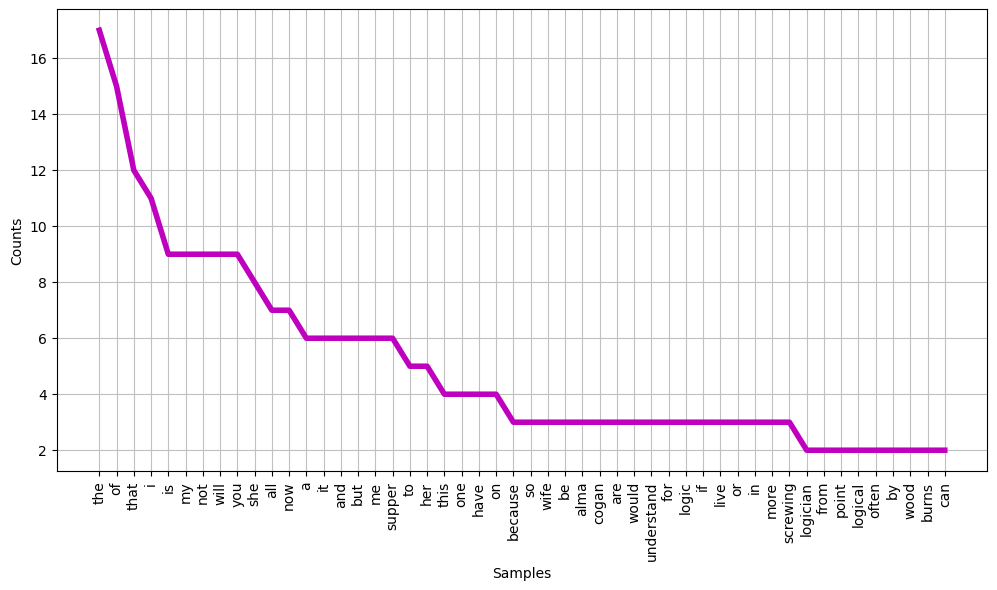

In [43]:
from nltk.probability import FreqDist

# Frequency Distribution Plot

# Calcula la freqüència de les paraules
freq_dist = FreqDist(words)

plt.figure(figsize=(12,6))
freq_dist.plot(50,cumulative=False, color = 'm', linewidth = 4)
plt.show()

Podem visuatzar la freqüència de les paraules també podem fer servir el núvol de paraules.

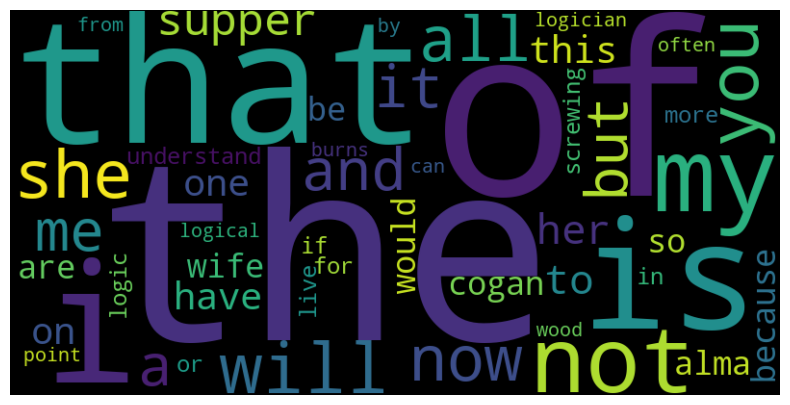

In [46]:
from wordcloud import WordCloud

# Supongamos que tienes un diccionario de frecuencia de palabras freq_dist
wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Com era d'esperar, les paraules més comuns són les més comuns de la llengua anglesa (veure https://www.espressoenglish.net/the-100-most-common-words-in-english/)

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.


# Exercici 3
Realitza sentiment analysis al teu conjunt de dades.